# **Import necessary libraries**

In [167]:
!pip install pandas pyarrow
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet






Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Extract Job Table data and preprocessing **

In [ ]:
#Read the Parquet file
job = pd.read_parquet('/content/a_0.parquet')
print(job.head(5))


  accrue_time alloc_node  alloc_sid  array_job_id  array_max_tasks  \
0         NaT       None        NaN       5982504              NaN   
1         NaT       None        NaN       1282595              NaN   
2         NaT       None        NaN       2484677              NaN   
3         NaT       None        NaN       5225653              NaN   
4         NaT       None        NaN       3900788              NaN   

   array_task_id array_task_str  array_task_throttle  assoc_id  batch_flag  \
0            NaN           None                  NaN       NaN         NaN   
1            NaN           None                  NaN       NaN         NaN   
2            NaN           None                  NaN       NaN         NaN   
3            NaN           None                  NaN       NaN         NaN   
4            NaN           None                  NaN       NaN         NaN   

   ... tres_bind  tres_freq  tres_per_job  tres_per_node  tres_per_socket  \
0  ...      None       None      

In [ ]:
#columns of the dataframe
job.columns

Index(['accrue_time', 'alloc_node', 'alloc_sid', 'array_job_id',
       'array_max_tasks', 'array_task_id', 'array_task_str',
       'array_task_throttle', 'assoc_id', 'batch_flag', 'batch_host',
       'billable_tres', 'bitflags', 'boards_per_node', 'contiguous',
       'cores_per_socket', 'cpus_alloc_layout', 'cpus_allocated',
       'cpus_per_task', 'cpus_per_tres', 'dependency', 'derived_ec',
       'eligible_time', 'end_time', 'exc_nodes', 'exit_code', 'features',
       'group_id', 'job_id', 'job_state', 'last_sched_eval', 'max_cpus',
       'max_nodes', 'mem_per_cpu', 'mem_per_node', 'min_memory_cpu',
       'min_memory_node', 'nice', 'nodes', 'ntasks_per_board',
       'ntasks_per_core', 'ntasks_per_core_str', 'ntasks_per_node',
       'ntasks_per_socket', 'ntasks_per_socket_str', 'num_cpus', 'num_nodes',
       'num_tasks', 'partition', 'pn_min_cpus', 'pn_min_memory',
       'pn_min_tmp_disk', 'power_flags', 'priority', 'profile', 'qos',
       'reboot', 'req_nodes', 'req_swit

In [ ]:
#To filter specific time period (22-06-01) on "start_time"  and "end_time" columns 

job['start_time'] = pd.to_datetime(job['start_time'])
job['end_time'] = pd.to_datetime(job['end_time'])

start_date = pd.to_datetime('2022-06-01').date()
end_date = pd.to_datetime('2022-06-02').date()

filtered_by_time_df = job[
    (job['start_time'].dt.date >= start_date) &
    (job['start_time'].dt.date < end_date) &
    (job['end_time'].dt.date >= start_date) &
    (job['end_time'].dt.date < end_date)
]
print(filtered_by_time_df)


       accrue_time alloc_node  alloc_sid  array_job_id  array_max_tasks  \
128988         NaT       None        NaN       3362713              NaN   
128989         NaT       None        NaN       5873459              NaN   
128990         NaT       None        NaN       1093298              NaN   
128991         NaT       None        NaN       1213303              NaN   
128992         NaT       None        NaN       1586798              NaN   
...            ...        ...        ...           ...              ...   
171903         NaT       None        NaN       4421277              NaN   
243220         NaT       None        NaN       5514360              NaN   
243619         NaT       None        NaN       2540221              NaN   
243874         NaT       None        NaN       3068919              NaN   
244993         NaT       None        NaN        388142              NaN   

        array_task_id array_task_str  array_task_throttle  assoc_id  \
128988            NaN       

In [ ]:
filtered_by_time_df.tail(10)

,accrue_time,alloc_node,alloc_sid,array_job_id,array_max_tasks,array_task_id,array_task_str,array_task_throttle,assoc_id,batch_flag,...,tres_bind,tres_freq,tres_per_job,tres_per_node,tres_per_socket,tres_per_task,tres_req_str,user_id,wait4switch,wckey
171028,NaT,None,NaN,1922438,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,2,NaN,None
171084,NaT,None,NaN,1302008,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:1,None,None,None,393,NaN,None
171314,NaT,None,NaN,3934229,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,None,None,None,None,624,NaN,None
171329,NaT,None,NaN,2048353,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,281,NaN,None
171382,NaT,None,NaN,1723400,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,1092,NaN,None
171903,NaT,None,NaN,4421277,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,1702,NaN,None
243220,NaT,None,NaN,5514360,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,None,None,None,None,1366,NaN,None
243619,NaT,None,NaN,2540221,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,88,NaN,None
243874,NaT,None,NaN,3068919,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,1380,NaN,None
244993,NaT,None,NaN,388142,NaN,NaN,None,NaN,NaN,NaN,...,None,None,None,gres:gpu:4,None,None,None,88,NaN,None


In [ ]:
filtered_by_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7369 entries, 128988 to 244993
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   accrue_time            0 non-null      datetime64[ns, UTC]
 1   alloc_node             0 non-null      object             
 2   alloc_sid              0 non-null      float64            
 3   array_job_id           7369 non-null   uint32             
 4   array_max_tasks        0 non-null      float64            
 5   array_task_id          44 non-null     float64            
 6   array_task_str         0 non-null      object             
 7   array_task_throttle    0 non-null      float64            
 8   assoc_id               0 non-null      float64            
 9   batch_flag             0 non-null      float64            
 10  batch_host             0 non-null      object             
 11  billable_tres          0 non-null      float64   

In [ ]:
filtered_by_time_df.shape

(7369, 89)

In [ ]:
#Get the columns with null values
null_columns = filtered_by_time_df.columns[filtered_by_time_df.isnull().any()]
print(null_columns)


Index(['accrue_time', 'alloc_node', 'alloc_sid', 'array_max_tasks',
       'array_task_id', 'array_task_str', 'array_task_throttle', 'assoc_id',
       'batch_flag', 'batch_host', 'billable_tres', 'bitflags',
       'boards_per_node', 'cores_per_socket', 'cpus_allocated',
       'cpus_per_task', 'cpus_per_tres', 'dependency', 'derived_ec',
       'eligible_time', 'exc_nodes', 'exit_code', 'features',
       'last_sched_eval', 'max_cpus', 'max_nodes', 'mem_per_cpu',
       'mem_per_node', 'min_memory_cpu', 'min_memory_node', 'nodes',
       'ntasks_per_board', 'ntasks_per_core', 'ntasks_per_core_str',
       'ntasks_per_node', 'ntasks_per_socket', 'ntasks_per_socket_str',
       'num_tasks', 'pn_min_cpus', 'pn_min_memory', 'pn_min_tmp_disk',
       'power_flags', 'profile', 'reboot', 'req_nodes', 'req_switch',
       'requeue', 'resize_time', 'restart_cnt', 'resv_name', 'run_time',
       'run_time_str', 'sched_nodes', 'shared', 'show_flags',
       'sockets_per_board', 'sockets_per_nod

In [ ]:
#To delete null columns
columns_to_drop = ['accrue_time','alloc_node','alloc_sid','array_max_tasks','array_task_str','array_task_throttle','assoc_id','batch_flag','batch_host','billable_tres',
    'bitflags','boards_per_node','cores_per_socket','cpus_allocated','cpus_per_task','cpus_per_tres','derived_ec','eligible_time','exc_nodes','exit_code','features',
    'last_sched_eval','max_cpus','max_nodes','mem_per_cpu','mem_per_node','min_memory_cpu','min_memory_node','ntasks_per_board','ntasks_per_socket','ntasks_per_socket_str',
    'num_tasks','pn_min_cpus','pn_min_memory','pn_min_tmp_disk','power_flags','profile','reboot','req_nodes','req_switch','requeue','resize_time','restart_cnt','resv_name',
    'run_time','run_time_str','shared','show_flags','sockets_per_board','sockets_per_node','state_reason','suspend_time','threads_per_core','time_limit','time_min','tres_alloc_str',
    'tres_bind','tres_freq','tres_per_job','tres_per_socket','tres_per_task','tres_per_task','tres_req_str','wait4switch','wckey','ntasks_per_core','ntasks_per_core_str',
       'ntasks_per_node'
]

clean_df = filtered_by_time_df.drop(columns_to_drop, axis=1)
print(clean_df)


        array_job_id  array_task_id  contiguous  \
128988       3362713            NaN       False   
128989       5873459            NaN       False   
128990       1093298            NaN       False   
128991       1213303            NaN       False   
128992       1586798            NaN       False   
...              ...            ...         ...   
171903       4421277            NaN       False   
243220       5514360            NaN       False   
243619       2540221            NaN       False   
243874       3068919            NaN       False   
244993        388142            NaN       False   

                                        cpus_alloc_layout dependency  \
128988  {332: [], 778: [], 292: [], 384: [], 147: [], ...       None   
128989                                          {566: []}       None   
128990                                         {None: []}       None   
128991                                          {736: []}       None   
128992                     

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7369 entries, 128988 to 244993
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   array_job_id       7369 non-null   uint32             
 1   array_task_id      44 non-null     float64            
 2   contiguous         7369 non-null   bool               
 3   cpus_alloc_layout  7369 non-null   object             
 4   dependency         122 non-null    object             
 5   end_time           7369 non-null   datetime64[ns, UTC]
 6   group_id           7369 non-null   uint32             
 7   job_id             7369 non-null   uint32             
 8   job_state          7369 non-null   object             
 9   nice               7369 non-null   int32              
 10  nodes              6496 non-null   object             
 11  num_cpus           7369 non-null   uint32             
 12  num_nodes          7369 non-null   uint16

In [ ]:
clean_df.isnull().sum()


array_job_id            0
array_task_id        7325
contiguous              0
cpus_alloc_layout       0
dependency           7247
end_time                0
group_id                0
job_id                  0
job_state               0
nice                    0
nodes                 873
num_cpus                0
num_nodes               0
partition               0
priority                0
qos                     0
sched_nodes          7343
start_time              0
submit_time             0
time_limit_str          0
tres_per_node         590
user_id                 0
dtype: int64

In [ ]:
clean_df.head(10)

,array_job_id,array_task_id,contiguous,cpus_alloc_layout,dependency,end_time,group_id,job_id,job_state,nice,...,num_nodes,partition,priority,qos,sched_nodes,start_time,submit_time,time_limit_str,tres_per_node,user_id
128988,3362713,NaN,False,"{332: [], 778: [], 292: [], 384: [], 147: [], ...",None,2022-06-01 06:05:46+00:00,25200,3362713,FAILED,0,...,20,1,183487,4,None,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
128989,5873459,NaN,False,{566: []},None,2022-06-01 09:59:54+00:00,25200,5873459,COMPLETED,0,...,1,1,123898,1,None,2022-06-01 09:53:32+00:00,2022-05-31 12:32:42+00:00,30:00,gres:gpu:4,161
128990,1093298,NaN,False,{None: []},None,2022-06-01 14:16:21+00:00,25200,1093298,CANCELLED,0,...,1,1,125686,1,None,2022-06-01 14:16:21+00:00,2022-06-01 14:08:51+00:00,1-00:00:00,gres:gpu:1,1242
128991,1213303,NaN,False,{736: []},None,2022-06-01 07:43:04+00:00,25200,1213303,FAILED,0,...,1,1,145082,1,None,2022-06-01 07:42:59+00:00,2022-06-01 07:42:22+00:00,30:00,gres:gpu:4,589
128992,1586798,NaN,False,{914: []},None,2022-06-01 10:29:49+00:00,25200,1586798,COMPLETED,0,...,1,1,123907,1,None,2022-06-01 10:23:09+00:00,2022-05-31 12:32:48+00:00,30:00,gres:gpu:4,161
128993,274353,NaN,False,{155: []},None,2022-06-01 17:00:16+00:00,25200,274353,COMPLETED,0,...,1,1,124988,1,None,2022-06-01 16:47:54+00:00,2022-06-01 16:45:00+00:00,1:00:00,gres:gpu:4,1044
128994,2341955,NaN,False,{None: []},None,2022-06-01 14:16:21+00:00,25200,2341955,CANCELLED,0,...,1,1,125686,1,None,2022-06-01 14:16:21+00:00,2022-06-01 14:09:03+00:00,1-00:00:00,gres:gpu:1,1242
128995,3660624,NaN,False,{None: []},None,2022-06-01 17:27:47+00:00,25200,3660624,CANCELLED,0,...,1,1,142254,1,None,2022-06-01 17:27:47+00:00,2022-06-01 17:23:23+00:00,1-00:00:00,None,1182
128997,4082914,NaN,False,{655: []},None,2022-06-01 09:11:24+00:00,25200,4082914,COMPLETED,0,...,1,1,124024,1,None,2022-06-01 09:04:10+00:00,2022-05-31 12:32:35+00:00,30:00,gres:gpu:4,161
129000,2874335,NaN,False,{223: []},None,2022-06-01 10:49:01+00:00,25200,2874335,COMPLETED,0,...,1,1,123837,1,None,2022-06-01 10:42:39+00:00,2022-05-31 12:33:01+00:00,30:00,gres:gpu:4,161


In [ ]:
#To get columns with null values
null_columns = clean_df.columns[clean_df.isnull().any()]
print(null_columns)


Index(['array_task_id', 'dependency', 'nodes', 'sched_nodes', 'tres_per_node'], dtype='object')


In [ ]:
#Drop null rows in  "nodes" column
clean_df.dropna(subset=['nodes'], inplace=True)



In [ ]:
#Drop some columns
clean_df.drop('array_task_id', axis=1, inplace=True)
clean_df.drop('cpus_alloc_layout', axis=1, inplace=True)
clean_df.drop('array_job_id', axis=1, inplace=True)
clean_df.drop('dependency', axis=1, inplace=True)
clean_df.drop('sched_nodes', axis=1, inplace=True)
clean_df.drop('group_id', axis=1, inplace=True)
clean_df.drop('priority', axis=1, inplace=True)



In [ ]:
#Fill some null rows "other" for not to loose data
clean_df["tres_per_node"].fillna('other', inplace=True)


In [ ]:
clean_df.shape

(6496, 15)

In [ ]:

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6496 entries, 128988 to 244993
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   contiguous      6496 non-null   bool               
 1   end_time        6496 non-null   datetime64[ns, UTC]
 2   job_id          6496 non-null   uint32             
 3   job_state       6496 non-null   object             
 4   nice            6496 non-null   int32              
 5   nodes           6496 non-null   object             
 6   num_cpus        6496 non-null   uint32             
 7   num_nodes       6496 non-null   uint16             
 8   partition       6496 non-null   object             
 9   qos             6496 non-null   object             
 10  start_time      6496 non-null   datetime64[ns, UTC]
 11  submit_time     6496 non-null   datetime64[ns, UTC]
 12  time_limit_str  6496 non-null   object             
 13  tres_per_node   6496 non-n

In [ ]:
#Change data type of nodes column.Because its data type is string which contains list that it also contains items itself.
clean_df['nodes'] = clean_df['nodes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print(clean_df['nodes'].dtype)  
print(type(clean_df['nodes'].iloc[0]))  # Print the first element of the 'my_column' column as a list

object
<class 'list'>


In [ ]:
#To have access all items inside of the lists in nodes column by "explode" function
clean_df = clean_df.explode('nodes').reset_index(drop=True)

print(clean_df)


       contiguous                  end_time   job_id  job_state  nice nodes  \
0           False 2022-06-01 06:05:46+00:00  3362713     FAILED     0    56   
1           False 2022-06-01 06:05:46+00:00  3362713     FAILED     0   120   
2           False 2022-06-01 06:05:46+00:00  3362713     FAILED     0   147   
3           False 2022-06-01 06:05:46+00:00  3362713     FAILED     0   161   
4           False 2022-06-01 06:05:46+00:00  3362713     FAILED     0   292   
...           ...                       ...      ...        ...   ...   ...   
11263       False 2022-06-01 23:58:41+00:00   388142  COMPLETED     0   812   
11264       False 2022-06-01 23:58:41+00:00   388142  COMPLETED     0   857   
11265       False 2022-06-01 23:58:41+00:00   388142  COMPLETED     0   882   
11266       False 2022-06-01 23:58:41+00:00   388142  COMPLETED     0   904   
11267       False 2022-06-01 23:58:41+00:00   388142  COMPLETED     0   959   

       num_cpus  num_nodes partition qos           

In [ ]:
clean_df.head(10)

,contiguous,end_time,job_id,job_state,nice,nodes,num_cpus,num_nodes,partition,qos,start_time,submit_time,time_limit_str,tres_per_node,user_id
0,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,56,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
1,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,120,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
2,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,147,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
3,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,161,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
4,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,292,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
5,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,318,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
6,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,332,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
7,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,341,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
8,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,384,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88
9,False,2022-06-01 06:05:46+00:00,3362713,FAILED,0,413,2560,20,1,4,2022-06-01 06:04:52+00:00,2022-06-01 05:38:04+00:00,1:00:00,gres:gpu:4,88


In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11268 entries, 0 to 11267
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   contiguous      11268 non-null  bool               
 1   end_time        11268 non-null  datetime64[ns, UTC]
 2   job_id          11268 non-null  uint32             
 3   job_state       11268 non-null  object             
 4   nice            11268 non-null  int32              
 5   nodes           11159 non-null  object             
 6   num_cpus        11268 non-null  uint32             
 7   num_nodes       11268 non-null  uint16             
 8   partition       11268 non-null  object             
 9   qos             11268 non-null  object             
 10  start_time      11268 non-null  datetime64[ns, UTC]
 11  submit_time     11268 non-null  datetime64[ns, UTC]
 12  time_limit_str  11268 non-null  object             
 13  tres_per_node   11268 non-null 

In [ ]:
clean_df.isnull().sum()


contiguous          0
end_time            0
job_id              0
job_state           0
nice                0
nodes             109
num_cpus            0
num_nodes           0
partition           0
qos                 0
start_time          0
submit_time         0
time_limit_str      0
tres_per_node       0
user_id             0
dtype: int64

In [ ]:
#After having access all items  of lists in nodes column,new null rows appeared because some lists didnt contain any item.
clean_df.dropna(subset=['nodes'], inplace=True)

In [ ]:
#To change data type of nodes column
clean_df['nodes'] = clean_df['nodes'].astype(int)


In [ ]:
#sort dataframe by 2 columns
clean_df.sort_values(by=['nodes', 'start_time'], ascending=[True, True], inplace=True)


In [ ]:
#Save csv
clean_df.to_csv('clean_df.csv', index=False)


In [ ]:
clean_df.shape

(11159, 15)

# **Extract Total Power data and Preprocessing**

In [ ]:
#read data from parquet format
total_power = pd.read_parquet('/content/a_0.parquet')
print(total_power.head(5))

                  timestamp  value node
0 2022-06-11 07:09:40+00:00    640  134
1 2022-06-11 07:10:00+00:00    620  134
2 2022-06-11 07:10:20+00:00    600  134
3 2022-06-11 07:10:40+00:00    500  134
4 2022-06-11 07:11:00+00:00    620  134


In [ ]:
#Change data type of column
total_power['node'] = total_power['node'].astype(int)


In [ ]:
#Change name of the column for clearity
total_power.rename(columns={'value': 'total_power'}, inplace=True)
total_power.rename(columns={'timestamp': 'timestamp_power'}, inplace=True)
total_power.rename(columns={'node': 'nodes'}, inplace=True)



In [ ]:
total_power.isnull().sum()


timestamp_power    0
total_power        0
nodes              0
dtype: int64

In [ ]:
total_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121542782 entries, 0 to 121542781
Data columns (total 3 columns):
 #   Column           Dtype              
---  ------           -----              
 0   timestamp_power  datetime64[ns, UTC]
 1   total_power      int32              
 2   nodes            int64              
dtypes: datetime64[ns, UTC](1), int32(1), int64(1)
memory usage: 2.3 GB


In [ ]:
total_power.shape

(121542782, 3)

In [ ]:
#Filter data frame for specific period 
total_power['timestamp_power'] = pd.to_datetime(total_power['timestamp_power'])

start_date = pd.to_datetime('2022-06-01').date()
end_date = pd.to_datetime('2022-06-02').date()
filtered_by_time_power = total_power[(total_power['timestamp_power'].dt.date >= start_date) & (total_power['timestamp_power'].dt.date < end_date)]
print(filtered_by_time_power)


                    timestamp_power  total_power  nodes
22263004  2022-06-01 22:00:00+00:00          420      0
22263005  2022-06-01 22:00:20+00:00          420      0
22263006  2022-06-01 22:00:40+00:00          420      0
22263007  2022-06-01 22:01:00+00:00          420      0
22263008  2022-06-01 22:01:20+00:00          420      0
...                             ...          ...    ...
115775555 2022-06-01 23:00:00+00:00          780    962
115775556 2022-06-01 22:00:00+00:00          640    963
115775557 2022-06-01 23:00:00+00:00          580    969
115775558 2022-06-01 23:00:00+00:00          720    974
115775559 2022-06-01 23:00:00+00:00          640    978

[4229280 rows x 3 columns]


In [ ]:
#aggregrate total power for 1 min
filtered_by_time_power['timestamp_power'] = filtered_by_time_power['timestamp_power'].dt.floor('Min')
df_grouped_1min = filtered_by_time_power.groupby(['timestamp_power', 'nodes']).mean().reset_index()
print(df_grouped_1min)


<ipython-input-115-6cbce5fc5718>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_time_power['timestamp_power'] = filtered_by_time_power['timestamp_power'].dt.floor('Min')


                  timestamp_power  nodes  total_power
0       2022-06-01 00:00:00+00:00      0   420.000000
1       2022-06-01 00:00:00+00:00      1   426.666667
2       2022-06-01 00:00:00+00:00      2   420.000000
3       2022-06-01 00:00:00+00:00      3   373.333333
4       2022-06-01 00:00:00+00:00      4   440.000000
...                           ...    ...          ...
1409755 2022-06-01 23:59:00+00:00    975   680.000000
1409756 2022-06-01 23:59:00+00:00    976   660.000000
1409757 2022-06-01 23:59:00+00:00    977   673.333333
1409758 2022-06-01 23:59:00+00:00    978   640.000000
1409759 2022-06-01 23:59:00+00:00    979   713.333333

[1409760 rows x 3 columns]


In [ ]:
#aggregrate total power for 5 mins
df_grouped_1min['timestamp_power'] = df_grouped_1min['timestamp_power'].dt.floor('5Min')
df_grouped_5min = df_grouped_1min.groupby(['timestamp_power', 'nodes']).mean().reset_index()
print(df_grouped_5min)


                 timestamp_power  nodes  total_power
0      2022-06-01 00:00:00+00:00      0   426.666667
1      2022-06-01 00:00:00+00:00      1   424.000000
2      2022-06-01 00:00:00+00:00      2   418.666667
3      2022-06-01 00:00:00+00:00      3   366.666667
4      2022-06-01 00:00:00+00:00      4   440.000000
...                          ...    ...          ...
281947 2022-06-01 23:55:00+00:00    975   682.666667
281948 2022-06-01 23:55:00+00:00    976   662.666667
281949 2022-06-01 23:55:00+00:00    977   672.000000
281950 2022-06-01 23:55:00+00:00    978   640.000000
281951 2022-06-01 23:55:00+00:00    979   721.333333

[281952 rows x 3 columns]


In [ ]:
df_grouped_5min.head(10)

,timestamp_power,nodes,total_power
0,2022-06-01 00:00:00+00:00,0,426.666667
1,2022-06-01 00:00:00+00:00,1,424.000000
2,2022-06-01 00:00:00+00:00,2,418.666667
3,2022-06-01 00:00:00+00:00,3,366.666667
4,2022-06-01 00:00:00+00:00,4,440.000000
5,2022-06-01 00:00:00+00:00,5,400.000000
6,2022-06-01 00:00:00+00:00,6,441.333333
7,2022-06-01 00:00:00+00:00,7,425.333333
8,2022-06-01 00:00:00+00:00,8,421.333333
9,2022-06-01 00:00:00+00:00,9,420.000000


In [ ]:
#Save csv
df_grouped_5min.to_csv('clean_power_df.csv', index=False)

In [ ]:
df_grouped_5min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281952 entries, 0 to 281951
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   timestamp_power  281952 non-null  datetime64[ns, UTC]
 1   nodes            281952 non-null  int64              
 2   total_power      281952 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 6.5 MB


In [ ]:
df_grouped_5min.shape

(281952, 3)

# **Merge 2 data frames**

In [169]:
#Read data frames
clean_df=pd.read_csv('/content/clean_df.csv')
clean_power_df=pd.read_csv('/content/clean_power_df.csv')


In [170]:
clean_power_df.head()

,timestamp_power,nodes,total_power
0,2022-06-01 00:00:00+00:00,0,426.666667
1,2022-06-01 00:00:00+00:00,1,424.000000
2,2022-06-01 00:00:00+00:00,2,418.666667
3,2022-06-01 00:00:00+00:00,3,366.666667
4,2022-06-01 00:00:00+00:00,4,440.000000


In [165]:
#calculate mean,std_devation and app_error
grouped_df = clean_power_df.groupby('nodes')
mean_average_df = grouped_df['total_power'].agg(['mean', 'std']).reset_index()
mean_average_df.rename(columns={'mean': 'mean_power', 'std': 'std_deviation'}, inplace=True)


approximation_error = mean_average_df['std_deviation'] / np.sqrt(grouped_df.size())


mean_average_df['app_error'] = approximation_error

# Print the resulting dataframe
print(mean_average_df)


     nodes  mean_power  std_deviation  app_error
0        0  425.199074       2.997048   0.176603
1        1  419.777778       3.900425   0.229835
2        2  410.287037       3.481406   0.205144
3        3  362.050926       1.672496   0.098553
4        4  548.587963     114.720269   6.759957
..     ...         ...            ...        ...
974    975  589.324074      88.507598   5.215360
975    976  552.486111      26.134613   1.539997
976    977  686.629630      95.073272   5.602246
977    978  561.236111      94.183731   5.549830
978    979  630.481481      47.984928   2.827539

[979 rows x 4 columns]


In [171]:
mean_average_df["nodes"].nunique()

979

In [172]:
mean_average = clean_power_df.groupby('nodes')['total_power'].mean().reset_index()
mean_average.rename(columns={'total_power': 'mean_power'}, inplace=True)
print(mean_average)


     nodes  mean_power
0        0  425.199074
1        1  419.777778
2        2  410.287037
3        3  362.050926
4        4  548.587963
..     ...         ...
974    975  589.324074
975    976  552.486111
976    977  686.629630
977    978  561.236111
978    979  630.481481

[979 rows x 2 columns]


In [173]:
#merge
merged_df_inner = pd.merge(clean_df, mean_average, on='nodes', how='inner')

print(merged_df_inner)


       contiguous                   end_time   job_id  job_state  nice  nodes  \
0           False  2022-06-01 10:59:07+00:00  4923945  COMPLETED     0      4   
1           False  2022-06-01 11:02:42+00:00  4533427  COMPLETED     0      4   
2           False  2022-06-01 11:13:23+00:00  4116121  CANCELLED     0      4   
3           False  2022-06-01 12:22:24+00:00  3223401     FAILED     0      4   
4           False  2022-06-01 12:27:18+00:00  5286326  COMPLETED     0      4   
...           ...                        ...      ...        ...   ...    ...   
11154       False  2022-06-01 17:38:40+00:00  4808786  COMPLETED     0    979   
11155       False  2022-06-01 17:38:40+00:00  3040459  COMPLETED     0    979   
11156       False  2022-06-01 17:38:40+00:00  3376089  COMPLETED     0    979   
11157       False  2022-06-01 17:38:36+00:00   178214  COMPLETED     0    979   
11158       False  2022-06-01 17:38:36+00:00  2082756  COMPLETED     0    979   

       num_cpus  num_nodes 

In [174]:
merged_df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11159 entries, 0 to 11158
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   contiguous      11159 non-null  bool   
 1   end_time        11159 non-null  object 
 2   job_id          11159 non-null  int64  
 3   job_state       11159 non-null  object 
 4   nice            11159 non-null  int64  
 5   nodes           11159 non-null  int64  
 6   num_cpus        11159 non-null  int64  
 7   num_nodes       11159 non-null  int64  
 8   partition       11159 non-null  int64  
 9   qos             11159 non-null  int64  
 10  start_time      11159 non-null  object 
 11  submit_time     11159 non-null  object 
 12  time_limit_str  11159 non-null  object 
 13  tres_per_node   11159 non-null  object 
 14  user_id         11159 non-null  int64  
 15  mean_power      11159 non-null  float64
dtypes: bool(1), float64(1), int64(8), object(6)
memory usage: 1.4+ MB


In [175]:
#Change data type of some columns
merged_df_inner['end_time'] = pd.to_datetime(merged_df_inner['end_time'])
merged_df_inner['start_time'] = pd.to_datetime(merged_df_inner['start_time'])
merged_df_inner['submit_time'] = pd.to_datetime(merged_df_inner['submit_time'])
merged_df_inner['partition'] = merged_df_inner['partition'].astype(str)
merged_df_inner['qos'] = merged_df_inner['qos'].astype(str)



In [176]:
merged_df_inner.head(10)

,contiguous,end_time,job_id,job_state,nice,nodes,num_cpus,num_nodes,partition,qos,start_time,submit_time,time_limit_str,tres_per_node,user_id,mean_power
0,False,2022-06-01 10:59:07+00:00,4923945,COMPLETED,0,4,128,1,2,2,2022-06-01 07:54:00+00:00,2022-06-01 07:53:24+00:00,4:00:00,gres:gpu:4,182,548.587963
1,False,2022-06-01 11:02:42+00:00,4533427,COMPLETED,0,4,128,1,2,2,2022-06-01 11:02:12+00:00,2022-06-01 11:02:11+00:00,20:00,gres:gpu:4,137,548.587963
2,False,2022-06-01 11:13:23+00:00,4116121,CANCELLED,0,4,160,4,2,2,2022-06-01 11:02:59+00:00,2022-06-01 11:02:27+00:00,20:00,gres:gpu:4,1232,548.587963
3,False,2022-06-01 12:22:24+00:00,3223401,FAILED,0,4,4,1,2,2,2022-06-01 11:45:35+00:00,2022-06-01 11:45:16+00:00,1:00:00,gres:gpu:4,1125,548.587963
4,False,2022-06-01 12:27:18+00:00,5286326,COMPLETED,0,4,4,1,2,2,2022-06-01 12:26:09+00:00,2022-06-01 12:25:50+00:00,20:00,gres:gpu:2,1345,548.587963
5,False,2022-06-01 12:37:06+00:00,5531165,COMPLETED,0,4,4,1,2,2,2022-06-01 12:34:17+00:00,2022-06-01 12:32:35+00:00,20:00,gres:gpu:2,1345,548.587963
6,False,2022-06-01 12:53:29+00:00,3534006,TIMEOUT,0,4,4,1,2,2,2022-06-01 12:43:20+00:00,2022-06-01 12:43:07+00:00,10:00,gres:gpu:1,173,548.587963
7,False,2022-06-01 13:08:29+00:00,118736,TIMEOUT,0,4,4,1,2,2,2022-06-01 12:58:21+00:00,2022-06-01 12:58:17+00:00,10:00,gres:gpu:1,173,548.587963
8,False,2022-06-01 13:50:57+00:00,3984144,CANCELLED,0,4,120,1,2,2,2022-06-01 13:11:21+00:00,2022-06-01 13:10:56+00:00,4:00:00,gres:gpu:4,239,548.587963
9,False,2022-06-01 08:24:20+00:00,2653230,FAILED,0,5,4,1,2,2,2022-06-01 08:20:01+00:00,2022-06-01 08:19:31+00:00,10:00,gres:gpu:1,239,503.708333


In [177]:
merged_df_inner.shape

(11159, 16)

In [178]:
merged_df_inner.isnull().sum()

contiguous        0
end_time          0
job_id            0
job_state         0
nice              0
nodes             0
num_cpus          0
num_nodes         0
partition         0
qos               0
start_time        0
submit_time       0
time_limit_str    0
tres_per_node     0
user_id           0
mean_power        0
dtype: int64

# **Visualisation**

In [180]:
merged_df_inner.nunique()


contiguous           1
end_time          4844
job_id            6387
job_state            6
nice                 1
nodes              926
num_cpus            33
num_nodes           22
partition            4
qos                  8
start_time        1819
submit_time       2325
time_limit_str      64
tres_per_node        6
user_id            188
mean_power         922
dtype: int64

In [181]:
merged_df_inner.describe().T


,count,mean,std,min,25%,50%,75%,max
job_id,11159.0,3.200578e+06,1.797805e+06,1562.000000,1.705826e+06,3.259750e+06,4.683526e+06,6.240902e+06
nice,11159.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
nodes,11159.0,4.891636e+02,2.954182e+02,4.000000,2.270000e+02,4.440000e+02,7.560000e+02,9.790000e+02
num_cpus,11159.0,1.975175e+03,3.498923e+03,4.000000,1.280000e+02,1.280000e+02,2.304000e+03,1.638400e+04
num_nodes,11159.0,1.642665e+01,2.700794e+01,1.000000,1.000000e+00,1.000000e+00,1.800000e+01,1.280000e+02
user_id,11159.0,6.607988e+02,5.334776e+02,2.000000,1.610000e+02,6.170000e+02,1.114000e+03,1.739000e+03
mean_power,11159.0,6.684330e+02,1.009651e+02,364.384259,6.004352e+02,6.588009e+02,7.211898e+02,1.169708e+03


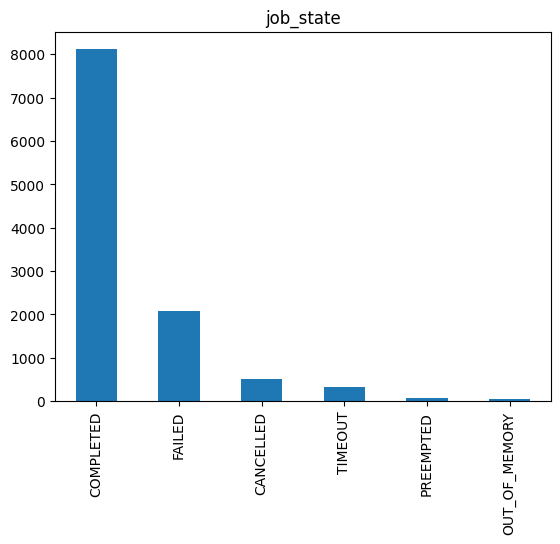

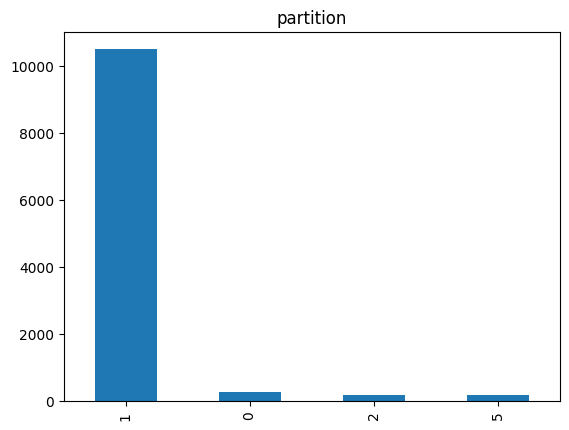

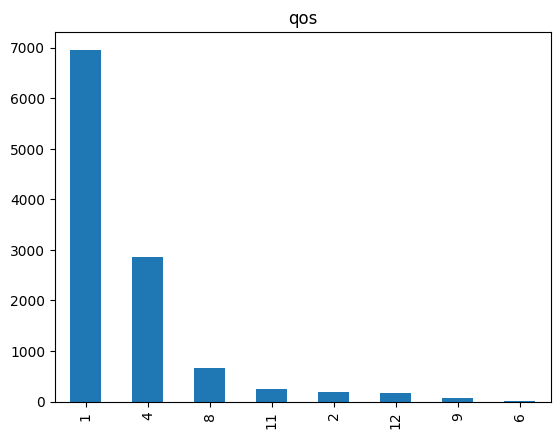

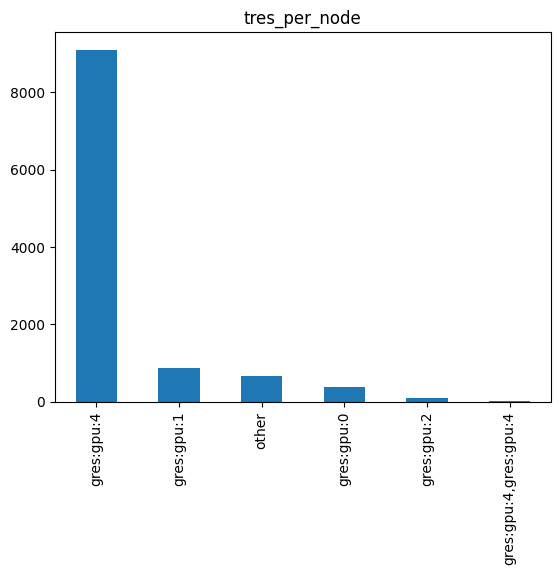

In [182]:
columns_list = ["job_state", "partition", "qos","tres_per_node"]

for column in columns_list:
    merged_df_inner[column].value_counts().plot.bar()
    plt.title(column)
    plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


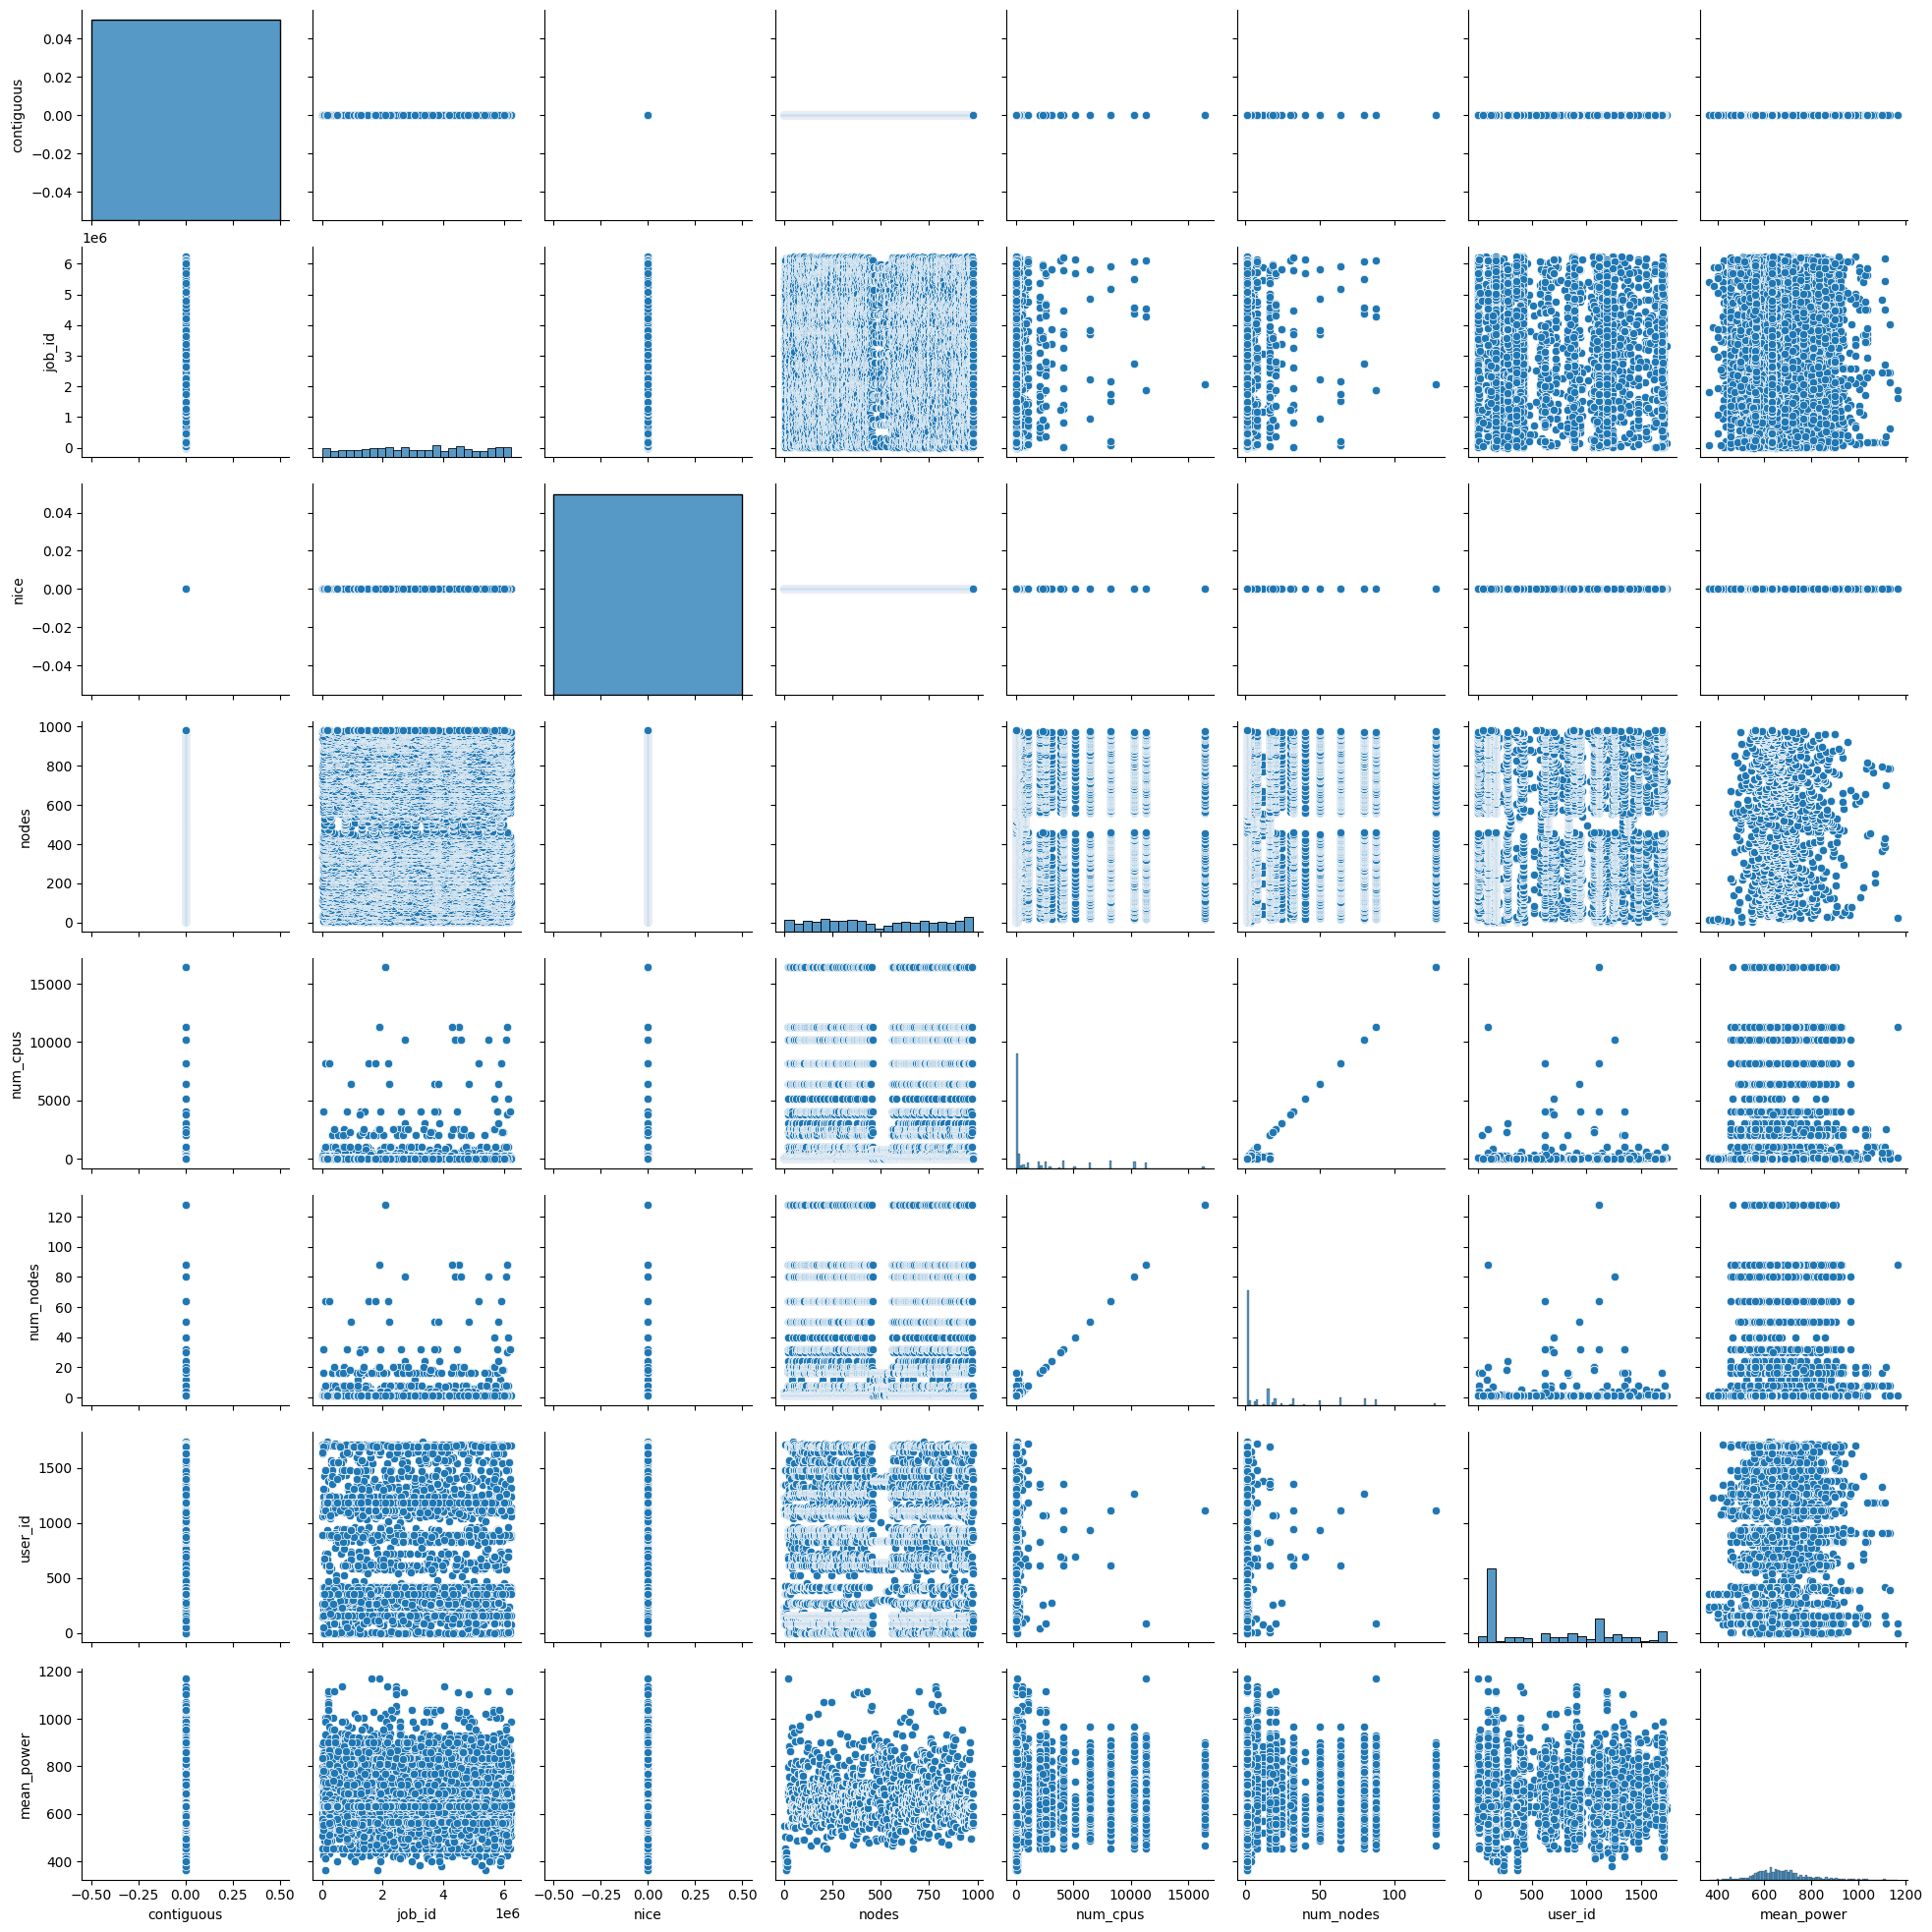

In [ ]:
sns.pairplot(merged_df_inner)

<ipython-input-184-0551e6113d51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df_inner.corr(), annot=True)


<Axes: >

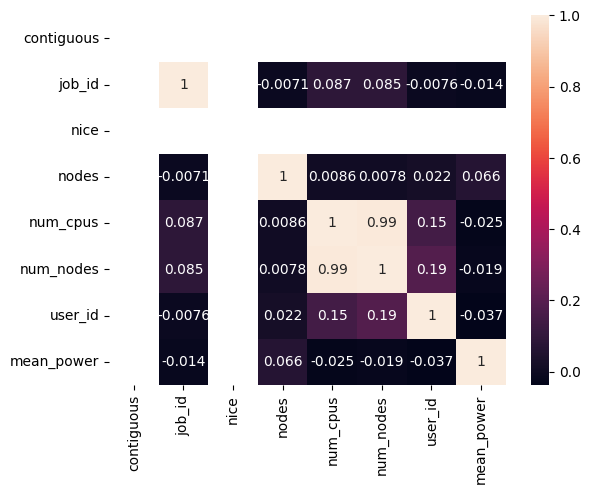

In [184]:
sns.heatmap(merged_df_inner.corr(), annot=True)


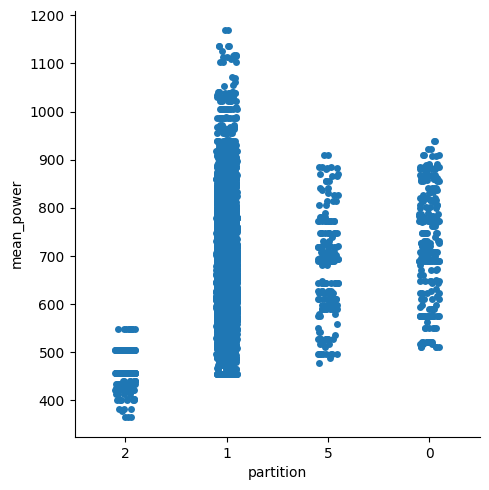

In [185]:

sns.catplot(x='partition', y='mean_power', data=merged_df_inner)


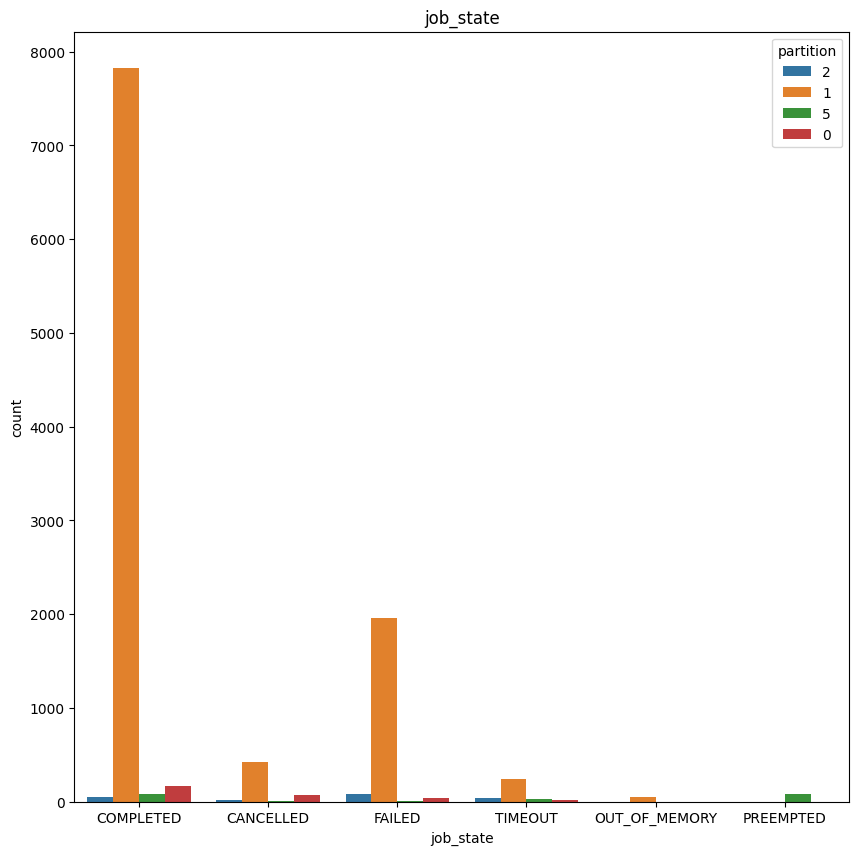

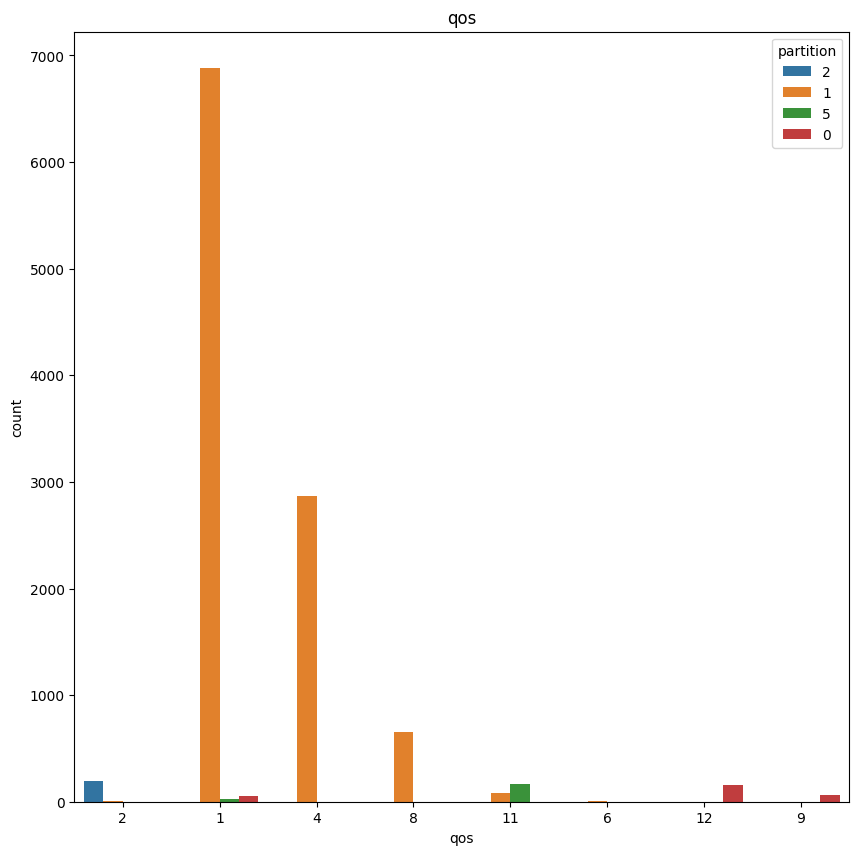

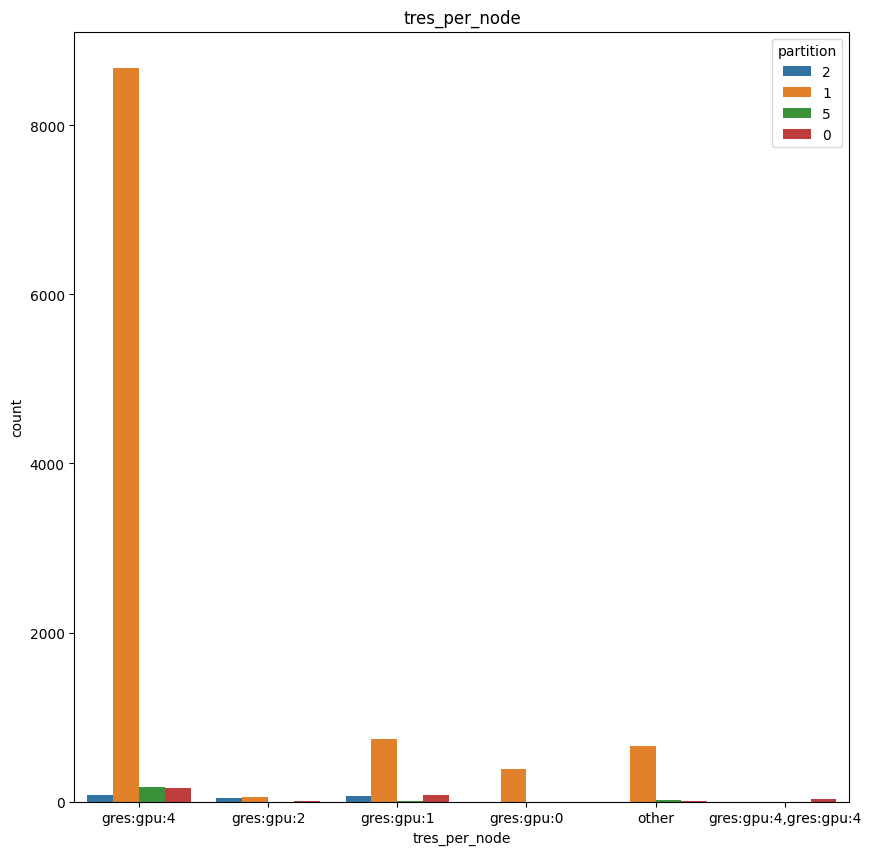

In [186]:
columns=["job_state","qos","tres_per_node"]
for col in columns:
    if col!='partition':
        plt.figure(figsize=(10, 10))
        plt.title(col)
        sns.countplot(x=merged_df_inner[col], data=merged_df_inner,hue="partition")
        plt.show()

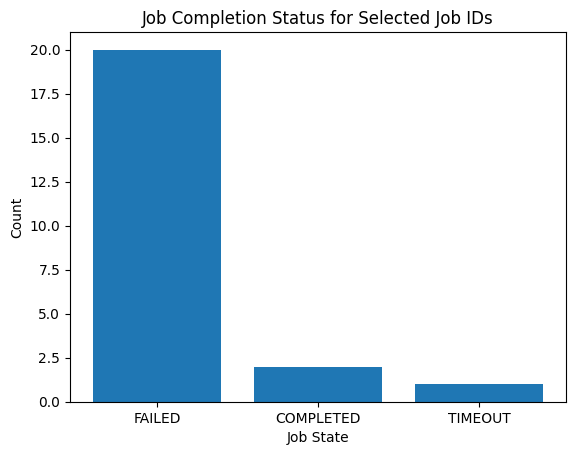

In [188]:
selected_job_ids = [3362713, 4197919, 3876854,1945798,1637339]

filtered_df = merged_df_inner[merged_df_inner['job_id'].isin(selected_job_ids)]

state_counts = filtered_df['job_state'].value_counts()

plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Job State')
plt.ylabel('Count')
plt.title('Job Completion Status for Selected Job IDs')
plt.show()



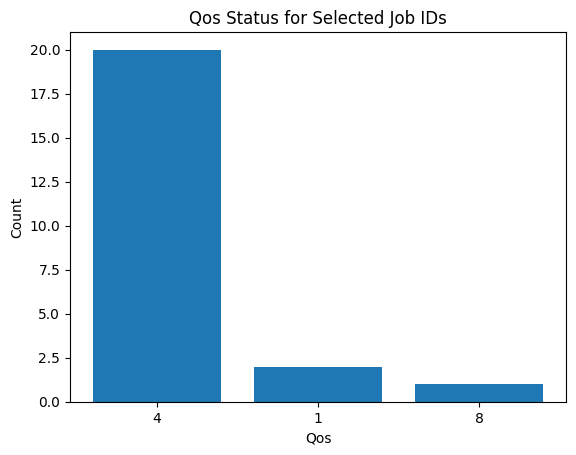

In [189]:
selected_job_ids = [3362713, 4197919, 3876854,1945798,1637339]

filtered_df = merged_df_inner[merged_df_inner['job_id'].isin(selected_job_ids)]

state_counts = filtered_df['qos'].value_counts()

plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Qos')
plt.ylabel('Count')
plt.title('Qos Status for Selected Job IDs')
plt.show()

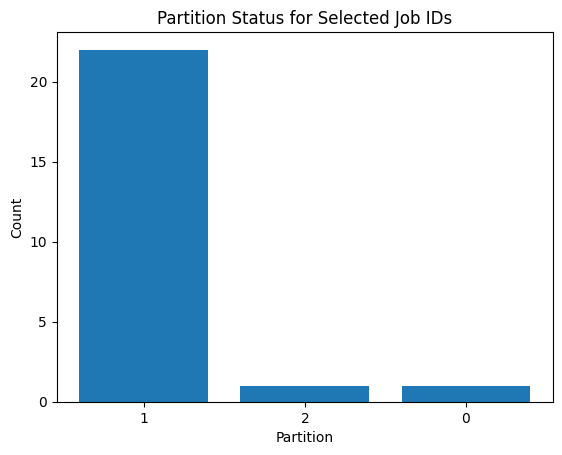

In [190]:
selected_job_ids = [3362713, 4197919, 3874994,1945798,3705477]

filtered_df = merged_df_inner[merged_df_inner['job_id'].isin(selected_job_ids)]

state_counts = filtered_df['partition'].value_counts()

plt.bar(state_counts.index, state_counts.values)
plt.xlabel('Partition')
plt.ylabel('Count')
plt.title('Partition Status for Selected Job IDs')
plt.show()

<ipython-input-191-be6cb9060fa5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df_inner.mean_power, kde=True)


<Axes: xlabel='mean_power', ylabel='Density'>

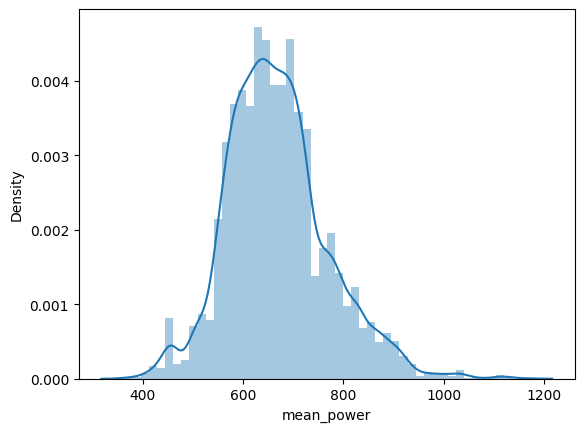

In [191]:
sns.distplot(merged_df_inner.mean_power, kde=True)


<ipython-input-192-ac8b59d62014>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_average_df.std_deviation, kde=True)


<Axes: xlabel='std_deviation', ylabel='Density'>

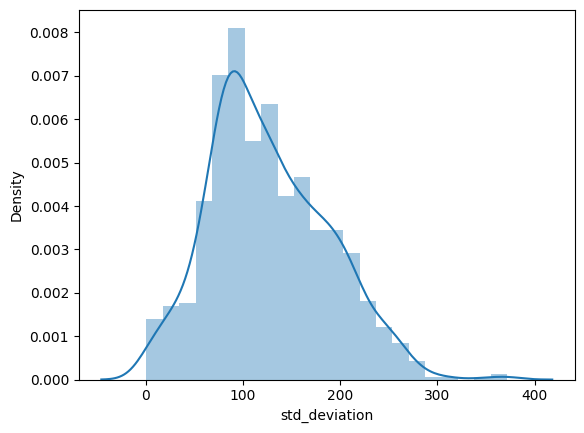

In [192]:
sns.distplot(mean_average_df.std_deviation, kde=True)


<ipython-input-193-482922d66a55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mean_average_df.app_error, kde=True)


<Axes: xlabel='app_error', ylabel='Density'>

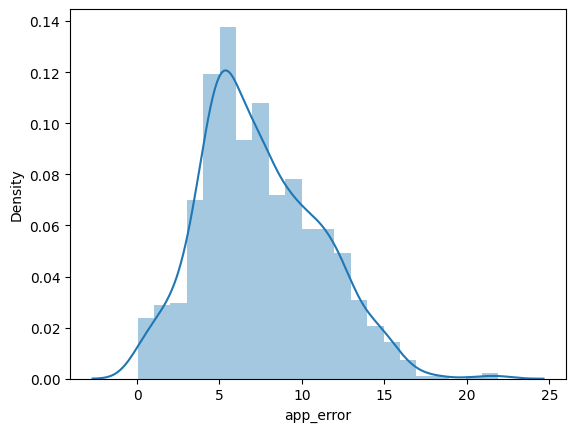

In [193]:
sns.distplot(mean_average_df.app_error, kde=True)


# **Modelling without normalization**

In [194]:
merged_df_inner.head(10)

,contiguous,end_time,job_id,job_state,nice,nodes,num_cpus,num_nodes,partition,qos,start_time,submit_time,time_limit_str,tres_per_node,user_id,mean_power
0,False,2022-06-01 10:59:07+00:00,4923945,COMPLETED,0,4,128,1,2,2,2022-06-01 07:54:00+00:00,2022-06-01 07:53:24+00:00,4:00:00,gres:gpu:4,182,548.587963
1,False,2022-06-01 11:02:42+00:00,4533427,COMPLETED,0,4,128,1,2,2,2022-06-01 11:02:12+00:00,2022-06-01 11:02:11+00:00,20:00,gres:gpu:4,137,548.587963
2,False,2022-06-01 11:13:23+00:00,4116121,CANCELLED,0,4,160,4,2,2,2022-06-01 11:02:59+00:00,2022-06-01 11:02:27+00:00,20:00,gres:gpu:4,1232,548.587963
3,False,2022-06-01 12:22:24+00:00,3223401,FAILED,0,4,4,1,2,2,2022-06-01 11:45:35+00:00,2022-06-01 11:45:16+00:00,1:00:00,gres:gpu:4,1125,548.587963
4,False,2022-06-01 12:27:18+00:00,5286326,COMPLETED,0,4,4,1,2,2,2022-06-01 12:26:09+00:00,2022-06-01 12:25:50+00:00,20:00,gres:gpu:2,1345,548.587963
5,False,2022-06-01 12:37:06+00:00,5531165,COMPLETED,0,4,4,1,2,2,2022-06-01 12:34:17+00:00,2022-06-01 12:32:35+00:00,20:00,gres:gpu:2,1345,548.587963
6,False,2022-06-01 12:53:29+00:00,3534006,TIMEOUT,0,4,4,1,2,2,2022-06-01 12:43:20+00:00,2022-06-01 12:43:07+00:00,10:00,gres:gpu:1,173,548.587963
7,False,2022-06-01 13:08:29+00:00,118736,TIMEOUT,0,4,4,1,2,2,2022-06-01 12:58:21+00:00,2022-06-01 12:58:17+00:00,10:00,gres:gpu:1,173,548.587963
8,False,2022-06-01 13:50:57+00:00,3984144,CANCELLED,0,4,120,1,2,2,2022-06-01 13:11:21+00:00,2022-06-01 13:10:56+00:00,4:00:00,gres:gpu:4,239,548.587963
9,False,2022-06-01 08:24:20+00:00,2653230,FAILED,0,5,4,1,2,2,2022-06-01 08:20:01+00:00,2022-06-01 08:19:31+00:00,10:00,gres:gpu:1,239,503.708333


In [195]:
merged_df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11159 entries, 0 to 11158
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   contiguous      11159 non-null  bool               
 1   end_time        11159 non-null  datetime64[ns, UTC]
 2   job_id          11159 non-null  int64              
 3   job_state       11159 non-null  object             
 4   nice            11159 non-null  int64              
 5   nodes           11159 non-null  int64              
 6   num_cpus        11159 non-null  int64              
 7   num_nodes       11159 non-null  int64              
 8   partition       11159 non-null  object             
 9   qos             11159 non-null  object             
 10  start_time      11159 non-null  datetime64[ns, UTC]
 11  submit_time     11159 non-null  datetime64[ns, UTC]
 12  time_limit_str  11159 non-null  object             
 13  tres_per_node   11159 non-null 

In [196]:
df = merged_df_inner.copy()


In [197]:
df.head()

,contiguous,end_time,job_id,job_state,nice,nodes,num_cpus,num_nodes,partition,qos,start_time,submit_time,time_limit_str,tres_per_node,user_id,mean_power
0,False,2022-06-01 10:59:07+00:00,4923945,COMPLETED,0,4,128,1,2,2,2022-06-01 07:54:00+00:00,2022-06-01 07:53:24+00:00,4:00:00,gres:gpu:4,182,548.587963
1,False,2022-06-01 11:02:42+00:00,4533427,COMPLETED,0,4,128,1,2,2,2022-06-01 11:02:12+00:00,2022-06-01 11:02:11+00:00,20:00,gres:gpu:4,137,548.587963
2,False,2022-06-01 11:13:23+00:00,4116121,CANCELLED,0,4,160,4,2,2,2022-06-01 11:02:59+00:00,2022-06-01 11:02:27+00:00,20:00,gres:gpu:4,1232,548.587963
3,False,2022-06-01 12:22:24+00:00,3223401,FAILED,0,4,4,1,2,2,2022-06-01 11:45:35+00:00,2022-06-01 11:45:16+00:00,1:00:00,gres:gpu:4,1125,548.587963
4,False,2022-06-01 12:27:18+00:00,5286326,COMPLETED,0,4,4,1,2,2,2022-06-01 12:26:09+00:00,2022-06-01 12:25:50+00:00,20:00,gres:gpu:2,1345,548.587963


In [198]:
#drop some columns
df.drop('end_time', axis=1, inplace=True)
df.drop('start_time', axis=1, inplace=True)
df.drop('submit_time', axis=1, inplace=True)
df.drop('job_id', axis=1, inplace=True)
df.drop('user_id', axis=1, inplace=True)
df.drop('nodes', axis=1, inplace=True)


In [199]:
df.columns


Index(['contiguous', 'job_state', 'nice', 'num_cpus', 'num_nodes', 'partition',
       'qos', 'time_limit_str', 'tres_per_node', 'mean_power'],
      dtype='object')

In [200]:
#endocing 
df=pd.get_dummies(df, drop_first=True)


In [201]:
#Target
X=df.drop('mean_power', axis=1)
Y=df['mean_power']


In [202]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.33)
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)

[677.75559955 678.43402252 678.736816   ... 653.94120667 677.75559955
 651.73496521]


In [203]:

def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    m = algo
    m.fit(X_train, Y_train)
    Y_train_pre = m.predict(X_train)
    Y_test_pre = m.predict(X_test)
    test_error = np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error = np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

cv = {'model': [], 'train_error': [], 'test_error': []}
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100),
          DecisionTreeRegressor()]

for model in models:
    res = model_building(model, X, Y)
    model_name = type(model).__name__
    train_error = "{:.6f}".format(res[0])
    test_error = "{:.6f}".format(res[1])
    cv['model'].append(model_name)
    cv['train_error'].append(train_error)
    cv['test_error'].append(test_error)

res = pd.DataFrame(cv)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.075e+07, tolerance: 9.145e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+07, tolerance: 9.145e+03
  model = cd_fast.enet_coordinate_descent(


In [204]:
res


,model,train_error,test_error
0,LinearRegression,94.463700,92.984726
1,Lasso,95.093348,93.493405
2,Ridge,94.464510,92.961984
3,ElasticNet,97.320132,95.958911
4,RandomForestRegressor,88.793226,89.578991
5,GradientBoostingRegressor,92.380943,91.130623
6,DecisionTreeRegressor,88.659427,90.134174


<ipython-input-205-dbf1abb5f416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)


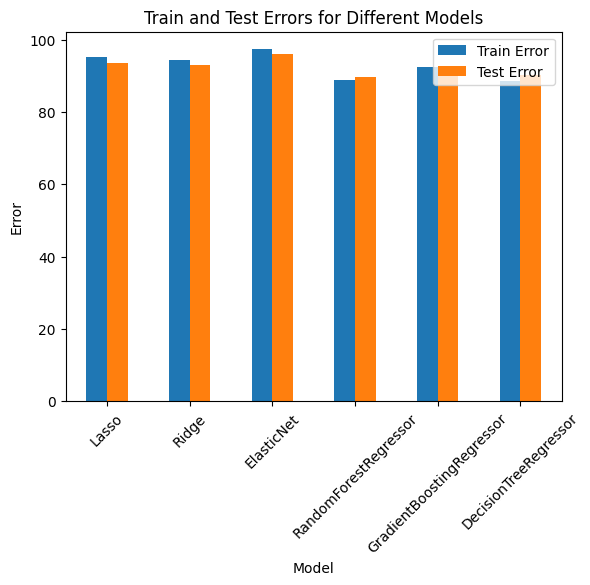

In [205]:
res_filtered = res[res['model'] != 'LinearRegression']

res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)

res_filtered.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different Models')
plt.xticks(rotation=45)
plt.legend(["Train Error", "Test Error"])
plt.show()



In [210]:


def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    m = algo
    m.fit(X_train, Y_train)
    Y_train_pre = m.predict(X_train)
    Y_test_pre = m.predict(X_test)
    test_error = np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error = np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

cv = {'model': [], 'train_error': [], 'test_error': []}
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100),
          DecisionTreeRegressor(max_depth=5)]  #  max_depth hyperparameter 

for model in models:
    res = model_building(model, X, Y)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[1])

res = pd.DataFrame(cv)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.075e+07, tolerance: 9.145e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+07, tolerance: 9.145e+03
  model = cd_fast.enet_coordinate_descent(


In [211]:
res

,model,train_error,test_error
0,LinearRegression,94.463700,92.984726
1,Lasso,95.093348,93.493405
2,Ridge,94.464510,92.961984
3,ElasticNet,97.320132,95.958911
4,RandomForestRegressor,88.792177,89.640728
5,GradientBoostingRegressor,92.380943,91.130623
6,DecisionTreeRegressor,94.531144,92.650978


<ipython-input-212-5b42967bab51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)


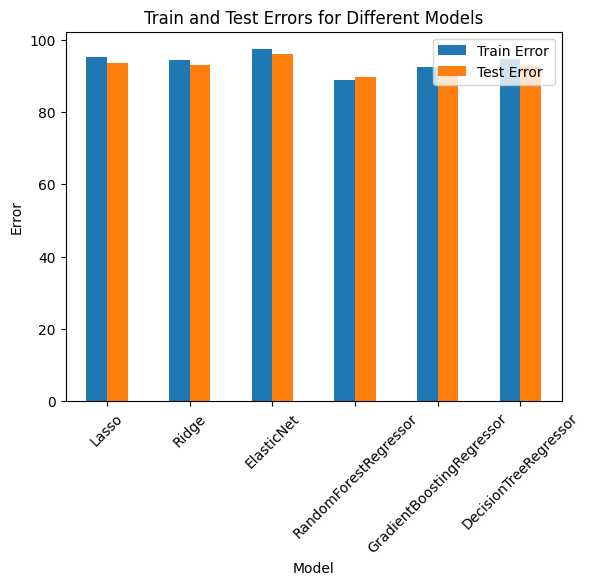

In [212]:
res_filtered = res[res['model'] != 'LinearRegression']

res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)

res_filtered.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different Models')
plt.xticks(rotation=45)
plt.legend(["Train Error", "Test Error"])
plt.show()


# **Modelling with normalization**

In [213]:
df = merged_df_inner.copy()


In [214]:
df.drop('end_time', axis=1, inplace=True)
df.drop('start_time', axis=1, inplace=True)
df.drop('submit_time', axis=1, inplace=True)
df.drop('job_id', axis=1, inplace=True)
df.drop('user_id', axis=1, inplace=True)
df.drop('nodes', axis=1, inplace=True)


In [215]:
#endocing and scaling
df=pd.get_dummies(df, drop_first=True)
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [216]:
#Target
X=df.drop('mean_power', axis=1)
Y=df['mean_power']

In [217]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.33)
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)

[ 0.09278587  0.09850091  0.10152051 ... -0.14705592  0.09278587
 -0.16664922]


In [218]:

def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    m = algo
    m.fit(X_train, Y_train)
    Y_train_pre = m.predict(X_train)
    Y_test_pre = m.predict(X_test)
    test_error = np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error = np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

cv = {'model': [], 'train_error': [], 'test_error': []}
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100),
          DecisionTreeRegressor()]

for model in models:
    res = model_building(model, X, Y)
    model_name = type(model).__name__
    train_error = "{:.6f}".format(res[0])
    test_error = "{:.6f}".format(res[1])
    cv['model'].append(model_name)
    cv['train_error'].append(train_error)
    cv['test_error'].append(test_error)

res = pd.DataFrame(cv)


In [219]:
res

,model,train_error,test_error
0,LinearRegression,0.935650,0.921008
1,Lasso,0.969997,0.957027
2,Ridge,0.935650,0.920996
3,ElasticNet,0.957574,0.944356
4,RandomForestRegressor,0.879401,0.887135
5,GradientBoostingRegressor,0.915020,0.902636
6,DecisionTreeRegressor,0.878159,0.892181


<ipython-input-220-dbf1abb5f416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)


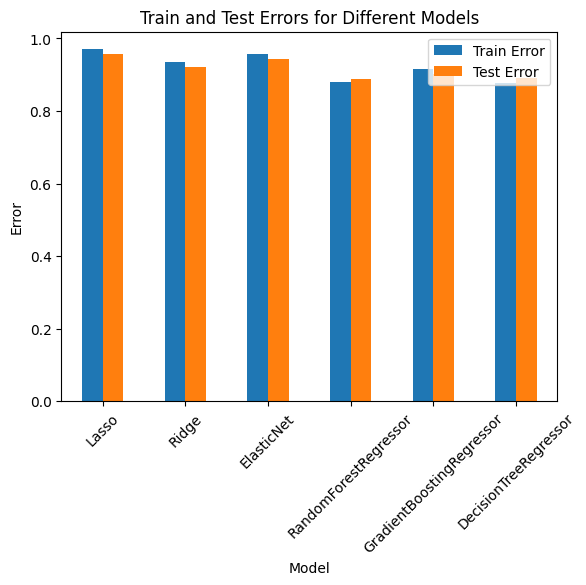

In [220]:
res_filtered = res[res['model'] != 'LinearRegression']

res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)

res_filtered.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different Models')
plt.xticks(rotation=45)
plt.legend(["Train Error", "Test Error"])
plt.show()



In [223]:


def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    m = algo
    m.fit(X_train, Y_train)
    Y_train_pre = m.predict(X_train)
    Y_test_pre = m.predict(X_test)
    test_error = np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error = np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

cv = {'model': [], 'train_error': [], 'test_error': []}
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100),
          DecisionTreeRegressor(max_depth=5)]  #  max_depth hyperparameter 

for model in models:
    res = model_building(model, X, Y)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[1])

res = pd.DataFrame(cv)


In [224]:
res

,model,train_error,test_error
0,LinearRegression,0.935650,0.921008
1,Lasso,0.969997,0.957027
2,Ridge,0.935650,0.920996
3,ElasticNet,0.957574,0.944356
4,RandomForestRegressor,0.879441,0.888229
5,GradientBoostingRegressor,0.915020,0.902636
6,DecisionTreeRegressor,0.936318,0.917695


<ipython-input-225-5b42967bab51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)


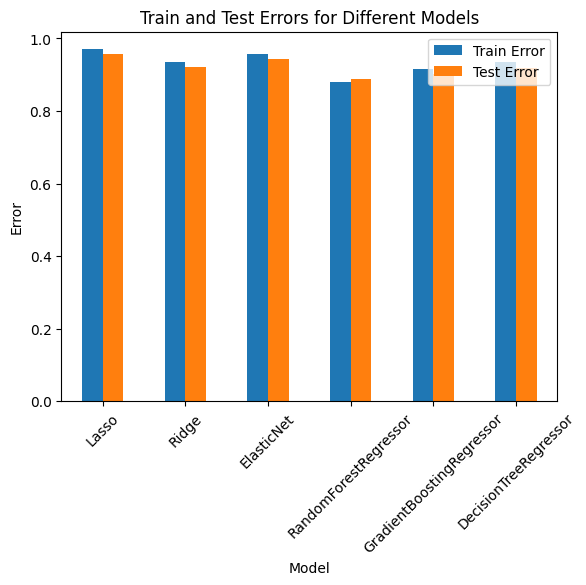

In [225]:
res_filtered = res[res['model'] != 'LinearRegression']

res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)

res_filtered.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different Models')
plt.xticks(rotation=45)
plt.legend(["Train Error", "Test Error"])
plt.show()


# **Modelling with 1 hour granuality with normalization**

In [139]:
#Read data frames
clean_df=pd.read_csv('/content/clean_df.csv')
clean_power_df=pd.read_csv('/content/clean_power_df.csv')


In [227]:
#Extract hour component and create a new 'hour' column
clean_df['start_time'] = pd.to_datetime(clean_df['start_time'])
clean_df['hour'] = clean_df['start_time'].dt.hour


In [228]:
# Extract hour component and create a new 'hour' column
clean_power_df['timestamp_power'] = pd.to_datetime(clean_power_df['timestamp_power'])
clean_power_df['hour'] = clean_power_df['timestamp_power'].dt.hour


In [229]:
#aggregrate total power for 1 hour
average_power = clean_power_df.groupby(['nodes', 'hour'])['total_power'].mean().reset_index()
average_power.columns = ['nodes', 'hour', 'total_power']

In [230]:
average_power.head(10)

,nodes,hour,total_power
0,0,0,428.333333
1,0,1,428.111111
2,0,2,426.888889
3,0,3,427.888889
4,0,4,427.000000
5,0,5,429.555556
6,0,6,427.222222
7,0,7,423.888889
8,0,8,423.555556
9,0,9,424.111111


In [144]:
average_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496 entries, 0 to 23495
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nodes        23496 non-null  int64  
 1   hour         23496 non-null  int64  
 2   total_power  23496 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 550.8 KB


In [231]:
# Perform an inner join on the "nodes" and "hour"  column
merged_df_inner = pd.merge(clean_df, average_power, on=['nodes', 'hour'], how='inner')

print(merged_df_inner)

       contiguous                   end_time   job_id  job_state  nice  nodes  \
0           False  2022-06-01 10:59:07+00:00  4923945  COMPLETED     0      4   
1           False  2022-06-01 11:02:42+00:00  4533427  COMPLETED     0      4   
2           False  2022-06-01 11:13:23+00:00  4116121  CANCELLED     0      4   
3           False  2022-06-01 12:22:24+00:00  3223401     FAILED     0      4   
4           False  2022-06-01 12:27:18+00:00  5286326  COMPLETED     0      4   
...           ...                        ...      ...        ...   ...    ...   
11154       False  2022-06-01 17:38:40+00:00  4808786  COMPLETED     0    979   
11155       False  2022-06-01 17:38:40+00:00  3040459  COMPLETED     0    979   
11156       False  2022-06-01 17:38:40+00:00  3376089  COMPLETED     0    979   
11157       False  2022-06-01 17:38:36+00:00   178214  COMPLETED     0    979   
11158       False  2022-06-01 17:38:36+00:00  2082756  COMPLETED     0    979   

       num_cpus  num_nodes 

In [232]:
#Change data type of some columns
merged_df_inner['end_time'] = pd.to_datetime(merged_df_inner['end_time'])
merged_df_inner['start_time'] = pd.to_datetime(merged_df_inner['start_time'])
merged_df_inner['submit_time'] = pd.to_datetime(merged_df_inner['submit_time'])
merged_df_inner['partition'] = merged_df_inner['partition'].astype(str)
merged_df_inner['qos'] = merged_df_inner['qos'].astype(str)



In [234]:
df = merged_df_inner.copy()
df.drop('end_time', axis=1, inplace=True)
df.drop('start_time', axis=1, inplace=True)
df.drop('submit_time', axis=1, inplace=True)
df.drop('job_id', axis=1, inplace=True)
df.drop('user_id', axis=1, inplace=True)
df.drop('nodes', axis=1, inplace=True)


In [235]:
df.columns

Index(['contiguous', 'job_state', 'nice', 'num_cpus', 'num_nodes', 'partition',
       'qos', 'time_limit_str', 'tres_per_node', 'hour', 'total_power'],
      dtype='object')

In [236]:
#endocing and scaling
df=pd.get_dummies(df, drop_first=True)
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [237]:
#Target
X=df.drop('total_power', axis=1)
Y=df['total_power']

In [238]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.33)
lr=LinearRegression()
lr.fit(X_train, Y_train)
Y_pred=lr.predict(X_test)
print(Y_pred)

[ 0.18810439  0.79838514  0.21342611 ... -0.55088019  0.18810439
 -0.67012691]


In [239]:

def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    m = algo
    m.fit(X_train, Y_train)
    Y_train_pre = m.predict(X_train)
    Y_test_pre = m.predict(X_test)
    test_error = np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error = np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

cv = {'model': [], 'train_error': [], 'test_error': []}
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100),
          DecisionTreeRegressor()]

for model in models:
    res = model_building(model, X, Y)
    model_name = type(model).__name__
    train_error = "{:.6f}".format(res[0])
    test_error = "{:.6f}".format(res[1])
    cv['model'].append(model_name)
    cv['train_error'].append(train_error)
    cv['test_error'].append(test_error)

res = pd.DataFrame(cv)


In [240]:
res

,model,train_error,test_error
0,LinearRegression,0.876646,0.897978
1,Lasso,0.954918,0.972975
2,Ridge,0.876645,0.897991
3,ElasticNet,0.920802,0.939322
4,RandomForestRegressor,0.618411,0.699557
5,GradientBoostingRegressor,0.748703,0.764430
6,DecisionTreeRegressor,0.612593,0.724112


<ipython-input-241-dbf1abb5f416>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)


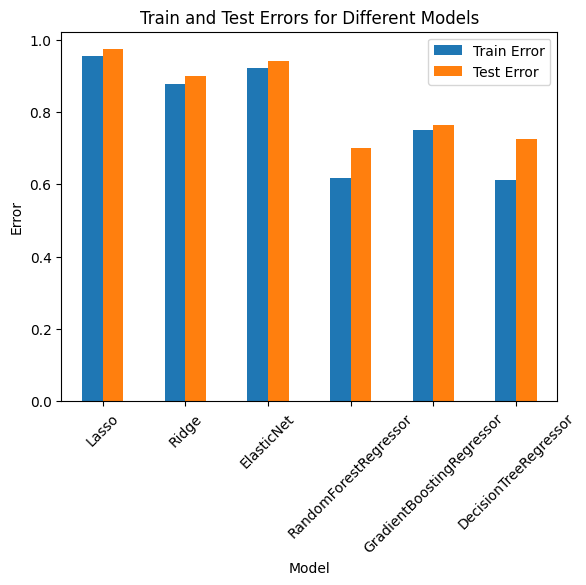

In [241]:
res_filtered = res[res['model'] != 'LinearRegression']

res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)

res_filtered.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different Models')
plt.xticks(rotation=45)
plt.legend(["Train Error", "Test Error"])
plt.show()



In [242]:


def model_building(algo, X, Y, test_size=0.20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    m = algo
    m.fit(X_train, Y_train)
    Y_train_pre = m.predict(X_train)
    Y_test_pre = m.predict(X_test)
    test_error = np.sqrt(mean_squared_error(Y_test, Y_test_pre))
    train_error = np.sqrt(mean_squared_error(Y_train, Y_train_pre))
    return train_error, test_error

cv = {'model': [], 'train_error': [], 'test_error': []}
models = [LinearRegression(), Lasso(alpha=0.1), Ridge(alpha=0.1), ElasticNet(alpha=0.1, l1_ratio=0.5),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(n_estimators=100),
          DecisionTreeRegressor(max_depth=5)]  #  max_depth hyperparameter 

for model in models:
    res = model_building(model, X, Y)
    cv['model'].append(type(model).__name__)
    cv['train_error'].append(res[0])
    cv['test_error'].append(res[1])

res = pd.DataFrame(cv)


In [243]:
res

,model,train_error,test_error
0,LinearRegression,0.876646,0.897978
1,Lasso,0.954918,0.972975
2,Ridge,0.876645,0.897991
3,ElasticNet,0.920802,0.939322
4,RandomForestRegressor,0.618548,0.703022
5,GradientBoostingRegressor,0.748703,0.764430
6,DecisionTreeRegressor,0.847137,0.849628


<ipython-input-244-5b42967bab51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)


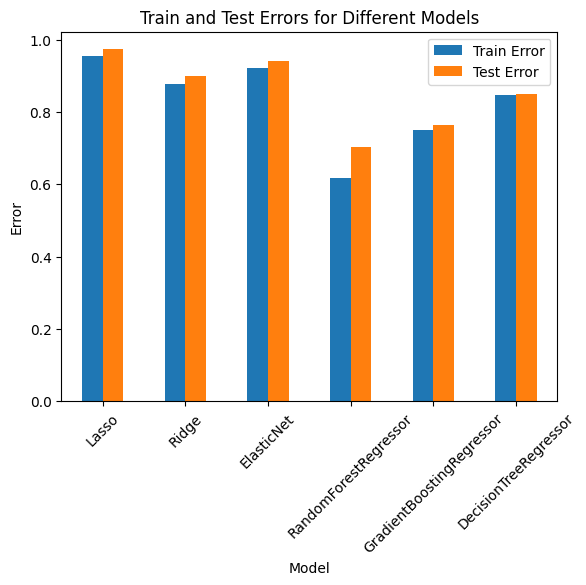

In [244]:
res_filtered = res[res['model'] != 'LinearRegression']

res_filtered[['train_error', 'test_error']] = res_filtered[['train_error', 'test_error']].apply(pd.to_numeric)

res_filtered.plot(x="model", y=["train_error", "test_error"], kind="bar")
plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Train and Test Errors for Different Models')
plt.xticks(rotation=45)
plt.legend(["Train Error", "Test Error"])
plt.show()
